In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jaswanthsai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Jaswanthsai\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Jaswanthsai\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Jaswanthsai\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2]:
df = pd.read_csv('IMDB Dataset.csv')

In [3]:
print(df.shape)
df1 = df.head(50000)
print(df1.shape)

(50000, 2)
(50000, 2)


In [4]:
df1.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
label = le.fit_transform(df1['sentiment'])
label

array([1, 1, 1, ..., 0, 0, 0])

In [6]:
df1.insert(2, "Sent_vale", label)

In [7]:
df1

,review,sentiment,Sent_vale
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1
...,...,...,...
49995,I thought this movie did a down right good job...,positive,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,0
49997,I am a Catholic taught in parochial elementary...,negative,0
49998,I'm going to have to disagree with the previou...,negative,0


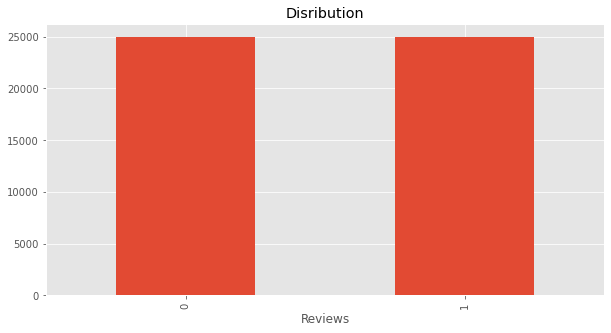

In [8]:
ax = df1['Sent_vale'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Disribution',
          figsize=(10, 5))
ax.set_xlabel('Reviews')
plt.show()

In [9]:
example = df1['review'][5]
print(example)

Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it's not preachy or boring. It just never gets old, despite my having seen it some 15 or more times in the last 25 years. Paul Lukas' performance brings tears to my eyes, and Bette Davis, in one of her very few truly sympathetic roles, is a delight. The kids are, as grandma says, more like "dressed-up midgets" than children, but that only makes them more fun to watch. And the mother's slow awakening to what's happening in the world and under her own roof is believable and startling. If I had a dozen thumbs, they'd all be "up" for this movie.


In [10]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Probably',
 'my',
 'all-time',
 'favorite',
 'movie',
 ',',
 'a',
 'story',
 'of',
 'selflessness']

In [11]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Probably', 'RB'),
 ('my', 'PRP$'),
 ('all-time', 'JJ'),
 ('favorite', 'JJ'),
 ('movie', 'NN'),
 (',', ','),
 ('a', 'DT'),
 ('story', 'NN'),
 ('of', 'IN'),
 ('selflessness', 'NN')]

In [28]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  Probably/RB
  my/PRP$
  all-time/JJ
  favorite/JJ
  movie/NN
  ,/,
  a/DT
  story/NN
  of/IN
  selflessness/NN
  ,/,
  sacrifice/NN
  and/CC
  dedication/NN
  to/TO
  a/DT
  noble/JJ
  cause/NN
  ,/,
  but/CC
  it/PRP
  's/VBZ
  not/RB
  preachy/JJ
  or/CC
  boring/JJ
  ./.
  It/PRP
  just/RB
  never/RB
  gets/VBZ
  old/JJ
  ,/,
  despite/IN
  my/PRP$
  having/VBG
  seen/VBN
  it/PRP
  some/DT
  15/CD
  or/CC
  more/JJR
  times/NNS
  in/IN
  the/DT
  last/JJ
  25/CD
  years/NNS
  ./.
  (PERSON Paul/NNP Lukas/NNP)
  '/POS
  performance/NN
  brings/VBZ
  tears/NNS
  to/TO
  my/PRP$
  eyes/NNS
  ,/,
  and/CC
  (PERSON Bette/NNP Davis/NNP)
  ,/,
  in/IN
  one/CD
  of/IN
  her/PRP$
  very/RB
  few/JJ
  truly/RB
  sympathetic/JJ
  roles/NNS
  ,/,
  is/VBZ
  a/DT
  delight/NN
  ./.
  The/DT
  kids/NNS
  are/VBP
  ,/,
  as/IN
  grandma/NN
  says/VBZ
  ,/,
  more/RBR
  like/IN
  ``/``
  dressed-up/JJ
  midgets/NNS
  ''/''
  than/IN
  children/NNS
  ,/,
  but/CC
  that/IN
  only/RB
  makes/

In [13]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Jaswanthsai\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [15]:
sia.polarity_scores(example)

{'neg': 0.017, 'neu': 0.758, 'pos': 0.225, 'compound': 0.9828}

In [16]:
res = {}
for i, row in tqdm(df1.iterrows(), total=len(df1)):
    text = row['review']
    res[i] = sia.polarity_scores(text)

  0%|          | 0/50000 [00:00<?, ?it/s]

In [17]:
vaders = pd.DataFrame(res).T
print(vaders)

         neg    neu    pos  compound
0      0.203  0.748  0.048   -0.9951
1      0.053  0.776  0.172    0.9641
2      0.094  0.714  0.192    0.9605
3      0.138  0.797  0.065   -0.9213
4      0.052  0.801  0.147    0.9744
...      ...    ...    ...       ...
49995  0.047  0.753  0.199    0.9890
49996  0.166  0.720  0.114   -0.6693
49997  0.208  0.683  0.108   -0.9851
49998  0.105  0.813  0.082   -0.7648
49999  0.135  0.723  0.141    0.4329

[50000 rows x 4 columns]


In [18]:
vaders.insert(4, "Sent_vale", label)

In [19]:
print(vaders)

         neg    neu    pos  compound  Sent_vale
0      0.203  0.748  0.048   -0.9951          1
1      0.053  0.776  0.172    0.9641          1
2      0.094  0.714  0.192    0.9605          1
3      0.138  0.797  0.065   -0.9213          0
4      0.052  0.801  0.147    0.9744          1
...      ...    ...    ...       ...        ...
49995  0.047  0.753  0.199    0.9890          1
49996  0.166  0.720  0.114   -0.6693          0
49997  0.208  0.683  0.108   -0.9851          0
49998  0.105  0.813  0.082   -0.7648          0
49999  0.135  0.723  0.141    0.4329          0

[50000 rows x 5 columns]


In [20]:
vaders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   neg        50000 non-null  float64
 1   neu        50000 non-null  float64
 2   pos        50000 non-null  float64
 3   compound   50000 non-null  float64
 4   Sent_vale  50000 non-null  int32  
dtypes: float64(4), int32(1)
memory usage: 2.1 MB


In [114]:
r = []

for x in vaders["compound"]:
    if x > 0.82:
        r.append(1)
    else:
        r.append(0)


In [115]:
from sklearn.metrics import f1_score,accuracy_score,precision_score
print("Accuracy score : ",accuracy_score(vaders["Sent_vale"],r)*100)
print("Precision score : ",precision_score(vaders["Sent_vale"],r)*100)
print("F1 score : ",f1_score(vaders["Sent_vale"],r, average='weighted')*100)

Accuracy score :  72.214
Precision score :  72.20245472354375
F1 score :  72.21399812166626


In [116]:

vaders.insert(5, "pred_vale", r)

ValueError: cannot insert pred_vale, already exists

In [23]:
print(vaders)

         neg    neu    pos  compound  Sent_vale  pred_vale
0      0.203  0.748  0.048   -0.9951          1          0
1      0.053  0.776  0.172    0.9641          1          1
2      0.094  0.714  0.192    0.9605          1          1
3      0.138  0.797  0.065   -0.9213          0          0
4      0.052  0.801  0.147    0.9744          1          1
...      ...    ...    ...       ...        ...        ...
49995  0.047  0.753  0.199    0.9890          1          1
49996  0.166  0.720  0.114   -0.6693          0          0
49997  0.208  0.683  0.108   -0.9851          0          0
49998  0.105  0.813  0.082   -0.7648          0          0
49999  0.135  0.723  0.141    0.4329          0          1

[50000 rows x 6 columns]


In [55]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(vaders["Sent_vale"],r)
print(cf_matrix)

[[13427 11573]
 [ 3611 21389]]


<AxesSubplot:>

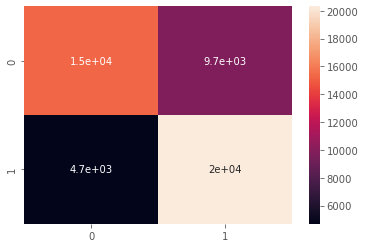

In [49]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [117]:
from sklearn.metrics import classification_report
print(classification_report(vaders["Sent_vale"], r))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72     25000
           1       0.72      0.72      0.72     25000

    accuracy                           0.72     50000
   macro avg       0.72      0.72      0.72     50000
weighted avg       0.72      0.72      0.72     50000



Model ROC CURVE : 


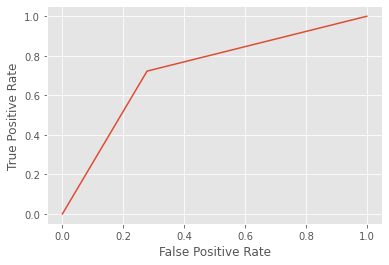

In [119]:
from sklearn import metrics
import matplotlib.pyplot as plt
#ROC Curve
fpr, tpr, _ = metrics.roc_curve(vaders["Sent_vale"],r)

print('Model ROC CURVE : ')   
#plotting ROC
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()